<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://files.oproject.org/tmvalogo.png" height="50%" width="50%">

# TMVA  Reader Example 

#### Example of applying the trained classified of TMVA on a data set and evaluate the classifier

In [1]:
TMVA::Tools::Instance();

### Choose TMVA method to evaluate

In [2]:
std::vector<TString> methodNames = {"BDT","DL_CPU"}

(std::vector<TString> &) { @0x7f93f7bc9570, @0x7f93f7bc9588 }


###  Give input file 


In [3]:
TFile * inputFile = TFile::Open("Higgs_data.root");

In [4]:
inputFile->ls();


TFile**		Higgs_data.root	
 TFile*		Higgs_data.root	
  KEY: TTree	sig_tree;1	tree
  KEY: TTree	bkg_tree;1	tree


In [5]:
auto sig_tree = (TTree*) inputFile->Get("sig_tree");
auto bkg_tree = (TTree*) inputFile->Get("bkg_tree");
sig_tree->Print(); 

******************************************************************************
*Tree    :sig_tree  : tree                                                   *
*Entries :    10000 : Total =         1177229 bytes  File  Size =     785298 *
*        :          : Tree compression factor =   1.48                       *
******************************************************************************
*Br    0 :Type      : Type/F                                                 *
*Entries :    10000 : Total  Size=      40556 bytes  File Size  =        307 *
*Baskets :        1 : Basket Size=    1500672 bytes  Compression= 130.54     *
*............................................................................*
*Br    1 :lepton_pT : lepton_pT/F                                            *
*Entries :    10000 : Total  Size=      40581 bytes  File Size  =      30464 *
*Baskets :        1 : Basket Size=    1500672 bytes  Compression=   1.32     *
*...................................................

### Declare Reader


In [6]:

TMVA::Reader reader( "!Color:!Silent" );


### Add Variable

We add variables to the reader exactly in the same way we did for the **DataLoader** during the training

We need to specify the address of the variable in order to pass it to TMVA when we iterate on the TTree


In [7]:
float m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb; 

In [8]:
// add variables 
reader.AddVariable("m_jj",&m_jj);
reader.AddVariable("m_jjj",&m_jjj);
reader.AddVariable("m_lv",&m_lv);
reader.AddVariable("m_jlv",&m_jlv);
reader.AddVariable("m_bb",&m_bb);
reader.AddVariable("m_wbb",&m_wbb);
reader.AddVariable("m_wwbb",&m_wwbb);

## Setup Classifiers

We set up the classifiers by reading the input weights from the appropriate files

The file is stored for example as 

####  *dataset/weights/TMVAClassification_BDT.weights.xml

In [9]:
for (size_t i = 0; i < methodNames.size(); ++i) { 
   TString weightfile = "dataset/weights/TMVA_Higgs_Classification_" + methodNames[i] + ".weights.xml";
   reader.BookMVA( methodNames[i], weightfile );
}

                         : Booking "BDT" of type "BDT" from dataset/weights/TMVA_Higgs_Classification_BDT.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_BDT.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDT" of type: "BDT"
                         : Booking "DL_CPU" of type "DL" from dataset/weights/TMVA_Higgs_Classification_DL_CPU.weights.xml.
                         : Reading weight file: dataset/weights/TMVA_Higgs_Classification_DL_CPU.weights.xml
                         : Booked classifier "DL_CPU" of type: "DL"


### Book histogram to visualize the response

In [11]:
auto h1 = new TH1D("h1","Classifier Output on Background Events",100,-1,1);
auto h2 = new TH1D("h2","Classifier Output on Signal Events",100,-1,1);
std::vector<std::vector<float>> vout(methodNames.size());

## Iterate on the events from the input TTree 

In [14]:
auto readEvents = [&](TTree & tree, TH1 & histo) {
  tree.SetBranchAddress("m_jj",&m_jj);
  tree.SetBranchAddress("m_jjj",&m_jjj);
  tree.SetBranchAddress("m_lv",&m_lv) ;
  tree.SetBranchAddress("m_jlv",&m_jlv);
  tree.SetBranchAddress("m_bb",&m_bb);
  tree.SetBranchAddress("m_wbb",&m_wbb);
  tree.SetBranchAddress("m_wwbb",&m_wwbb);
  for (size_t i = 0; i < methodNames.size(); ++i ) {
    vout[i].clear(); 
    vout[i].resize(tree.GetEntries());
  }
  for (Long64_t ievt=0; ievt < tree.GetEntries();ievt++) {

      if (ievt%500 == 0) std::cout << "--- ... Processing event: " << ievt << std::endl;

      tree.GetEntry(ievt);
      
      for (size_t i = 0; i < methodNames.size(); ++i ) {
    
         auto output = reader.EvaluateMVA(methodNames[i]);
  
         vout[i][ievt] = output;  
      }
  }
};
    

### Evaluation of the classifier on the given input events

We iterate on the input event in the given TTree. We provide as input first the background tree 
We need first to define the branches we are reading from the trees and then we can read the events calling 
the readEvents function we have defined before

In [15]:
// read events and fill histogram
readEvents(*bkg_tree,*h1); 

--- ... Processing event: 0
--- ... Processing event: 500
--- ... Processing event: 1000
--- ... Processing event: 1500
--- ... Processing event: 2000
--- ... Processing event: 2500
--- ... Processing event: 3000
--- ... Processing event: 3500
--- ... Processing event: 4000
--- ... Processing event: 4500
--- ... Processing event: 5000
--- ... Processing event: 5500
--- ... Processing event: 6000
--- ... Processing event: 6500
--- ... Processing event: 7000
--- ... Processing event: 7500
--- ... Processing event: 8000
--- ... Processing event: 8500
--- ... Processing event: 9000
--- ... Processing event: 9500


In [16]:
std::vector<std::vector<float>> bkg_results = vout; 

### Evaluation on the signal  events

We evaluate now the classifier on the another tree (e.g. the signal events)



In [17]:
readEvents(*sig_tree,*h2); 

--- ... Processing event: 0
--- ... Processing event: 500
--- ... Processing event: 1000
--- ... Processing event: 1500
--- ... Processing event: 2000
--- ... Processing event: 2500
--- ... Processing event: 3000
--- ... Processing event: 3500
--- ... Processing event: 4000
--- ... Processing event: 4500
--- ... Processing event: 5000
--- ... Processing event: 5500
--- ... Processing event: 6000
--- ... Processing event: 6500
--- ... Processing event: 7000
--- ... Processing event: 7500
--- ... Processing event: 8000
--- ... Processing event: 8500
--- ... Processing event: 9000
--- ... Processing event: 9500


In [18]:
std::vector<std::vector<float>> sig_results = vout; 

## Make ROC plot

In [23]:
for (size_t i = 0; i < methodNames.size(); ++i) {
    TMVA::ROCCurve * roc = new TMVA::ROCCurve(sig_results[i], bkg_results[i]);
    TGraph *  roc_graph  = roc->GetROCCurve(); 
    roc_graph->SetTitle(methodNames[i]);
    std::cout << "method " << methodNames[i] << " ROC integral = " << roc->GetROCIntegral() << std::end;
    roc_graph->SetLineColor(i+1);
    if (i == 0) roc_graph->Draw("AL");
    else roc_graph->Draw("L");
}

input_line_115:6:96: error: reference to overloaded function could not be resolved; did you mean to call it?
    std::cout << "method " << methodNames[i] << " ROC integral = " << roc->GetROCIntegral() << std::end;
                                                                                               ^~~~~~~~
/Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/initializer_list:109:1: note: possible target for call
end(initializer_list<_Ep> __il) _NOEXCEPT
^
/Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/iterator:1418:1: note: possible target for call
end(_Tp (&__array)[_Np])
^
/Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/iterator:1444:1: note: possible target for call
end(_Cp& __c) -> decltype(__c.end())
^
/Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/bin/../include/c++/v1/i

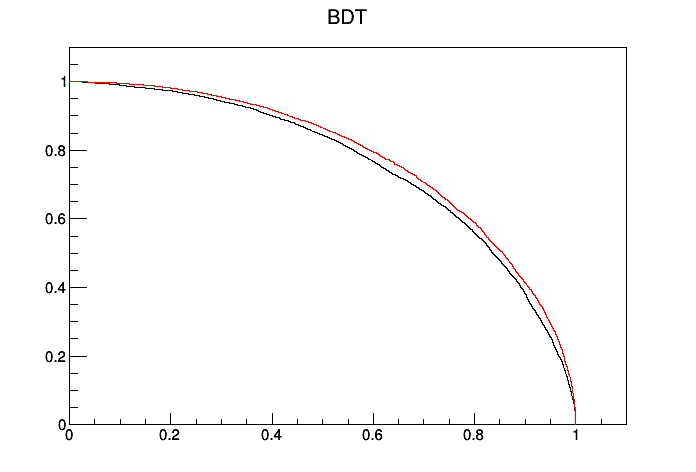

input_line_97:2:8: error: expected unqualified-id
 (std::((*(std::__1::ostream*)0x7fffc2682660)) << "ROC integral = " << roc.GetROCIntegral())
       ^
input_line_97:2:72: error: use of undeclared identifier 'roc'
 (std::((*(std::__1::ostream*)0x7fffc2682660)) << "ROC integral = " << roc.GetROCIntegral())
                                                                       ^
Error in <HandleInterpreterException>: Error evaluating expression (std::((*(std::__1::ostream*)0x7fffc2682660)) << "ROC integral = " << roc.GetROCIntegral()).
Execution of your code was aborted.


In [22]:
gPad->Draw();
std::cout << "ROC integral = " << roc.GetROCIntegral(); 